In [1]:
# Import packages here
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
from cartopy import config
import cartopy.crs as ccrs

import climlab
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
warnings.filterwarnings('ignore')
%matplotlib inline

/data/keeling/a/tjhanke2/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# Load all data variables first
%run /data/keeling/a/tjhanke2/enso-energy-budget/Data/get_global_constants.ipynb
%run /data/keeling/a/tjhanke2/enso-energy-budget/Data/get_data_variables_fncs.ipynb

In [3]:
# This area is to be used as the user options section. Determine what needs to be plotted here. 
# 0 = don't plot, 1 = do plot
get_ceres_cre_mon = 1
get_ceres_cre_mon_zonal = 1
get_ceres_cre_mon_gm = 1

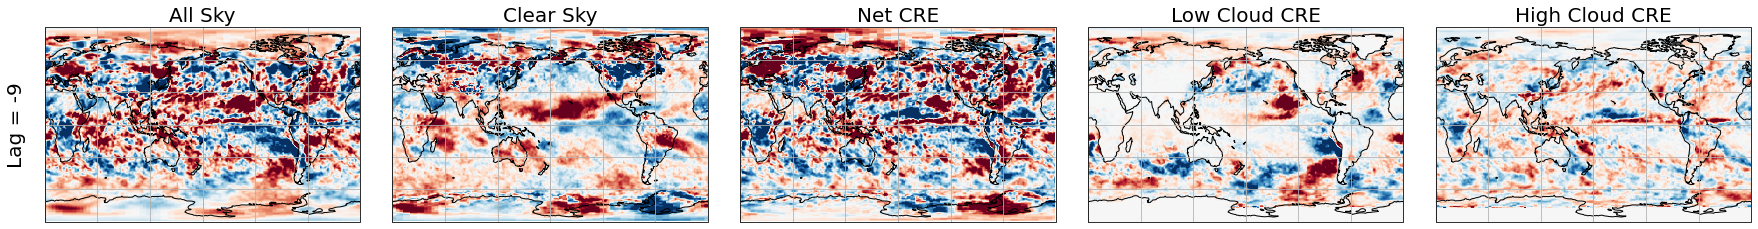

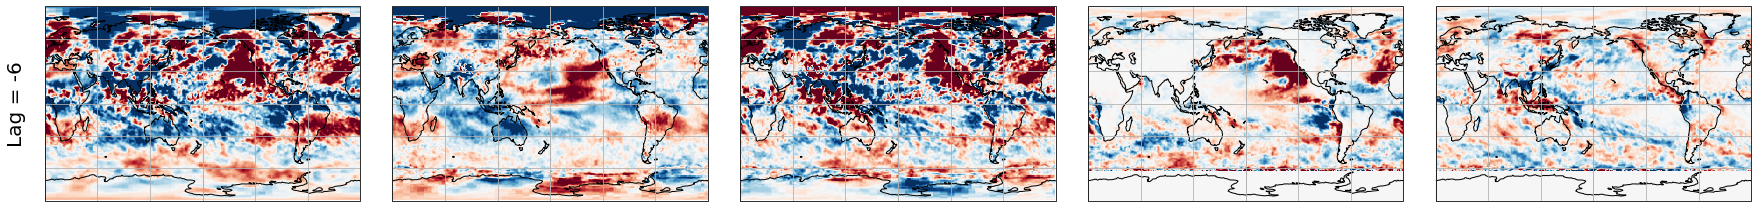

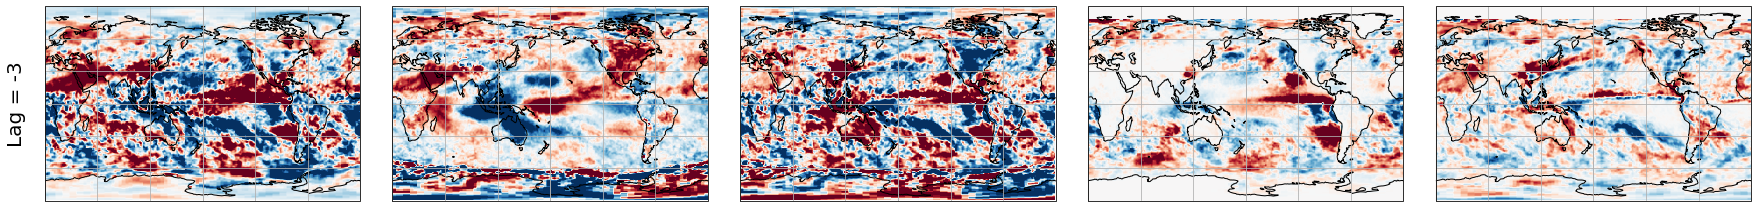

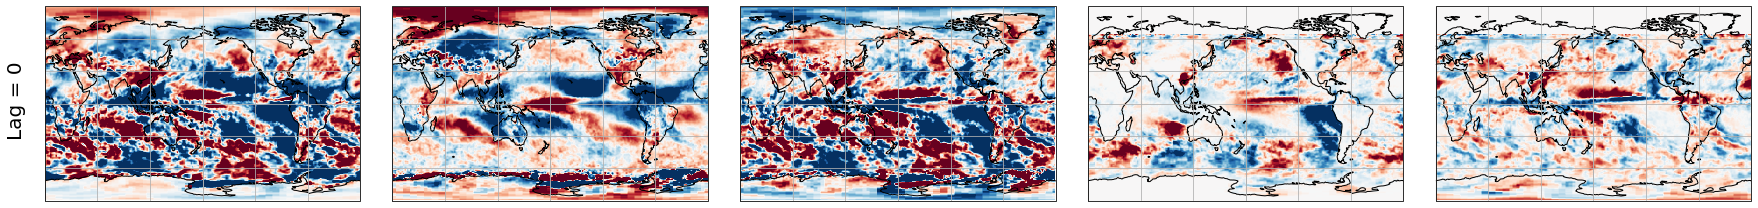

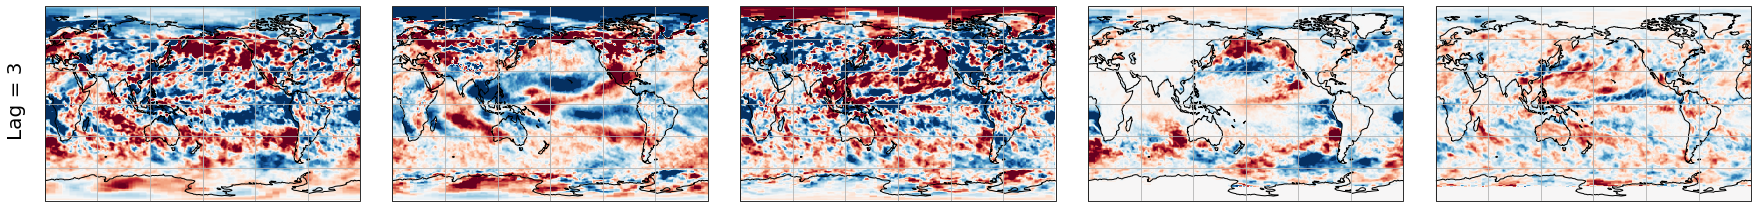

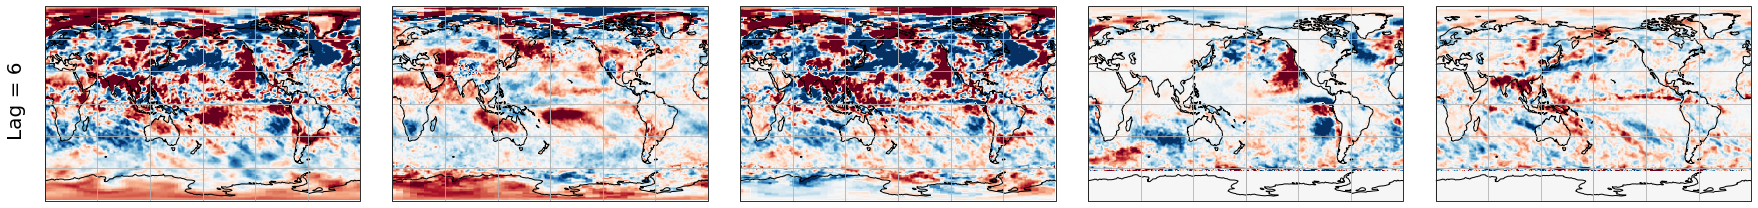

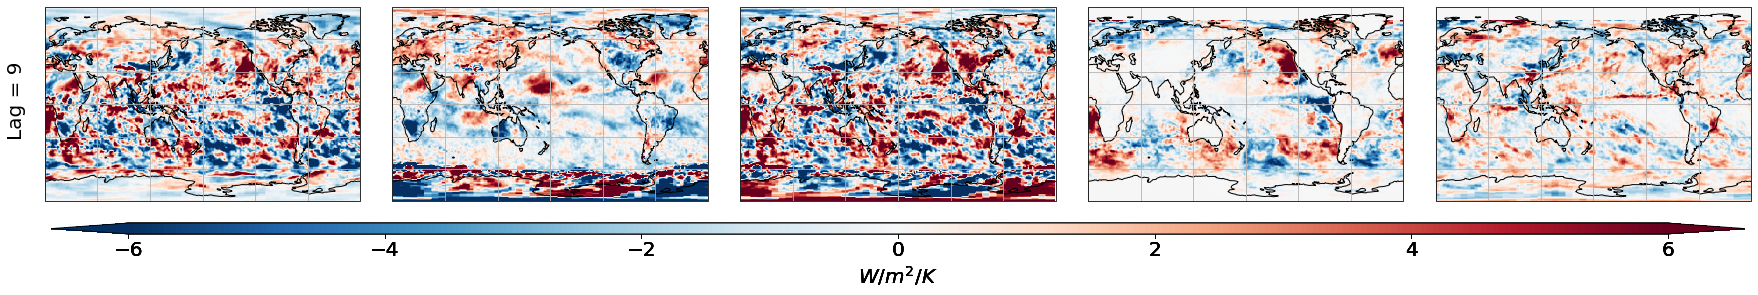

In [5]:
## Get regional composites for each lag
if get_ceres_cre_mon == 1:
    lag_list = np.arange(-9,10,3)
    
    for i in range(0,len(lag_list)):
        lag = lag_list[i]
        %run ./get_ceres_comp_mon.ipynb
        
        get_ceres_cre(lag)

In [7]:
## Place composites into datasets and save
reg_comps = xr.Dataset(data_vars={'all_sky':all_sky_comp,
                                  'clr_sky':clr_sky_comp,
                                  'net_cre':net_cre_comp,
                                  'loCld':loCld_cre_comp,
                                  'highCld':highCld_cre_comp,
                                  'SST':SST_comp},
                       coords={'latitude':all_sky_comp.latitude,
                               'longitude':all_sky_comp.longitude,
                               'lag':all_sky_comp.lag})

glb_comps = xr.Dataset(data_vars={'all_sky':all_sky_comp_glb,
                                  'clr_sky':clr_sky_comp_glb,
                                  'net_cre':net_cre_comp_glb,
                                  'loCld':loCld_cre_comp_glb,
                                  'highCld':highCld_cre_comp_glb,
                                  'SST':SST_comp_glb},
                       coords={'lag':all_sky_comp.lag})

reg_comps.to_netcdf(path='/data/keeling/a/tjhanke2/enso-energy-budget/Data/processed_data/composites/reg_comps.nc')
glb_comps.to_netcdf(path='/data/keeling/a/tjhanke2/enso-energy-budget/Data/processed_data/composites/glb_comps.nc')

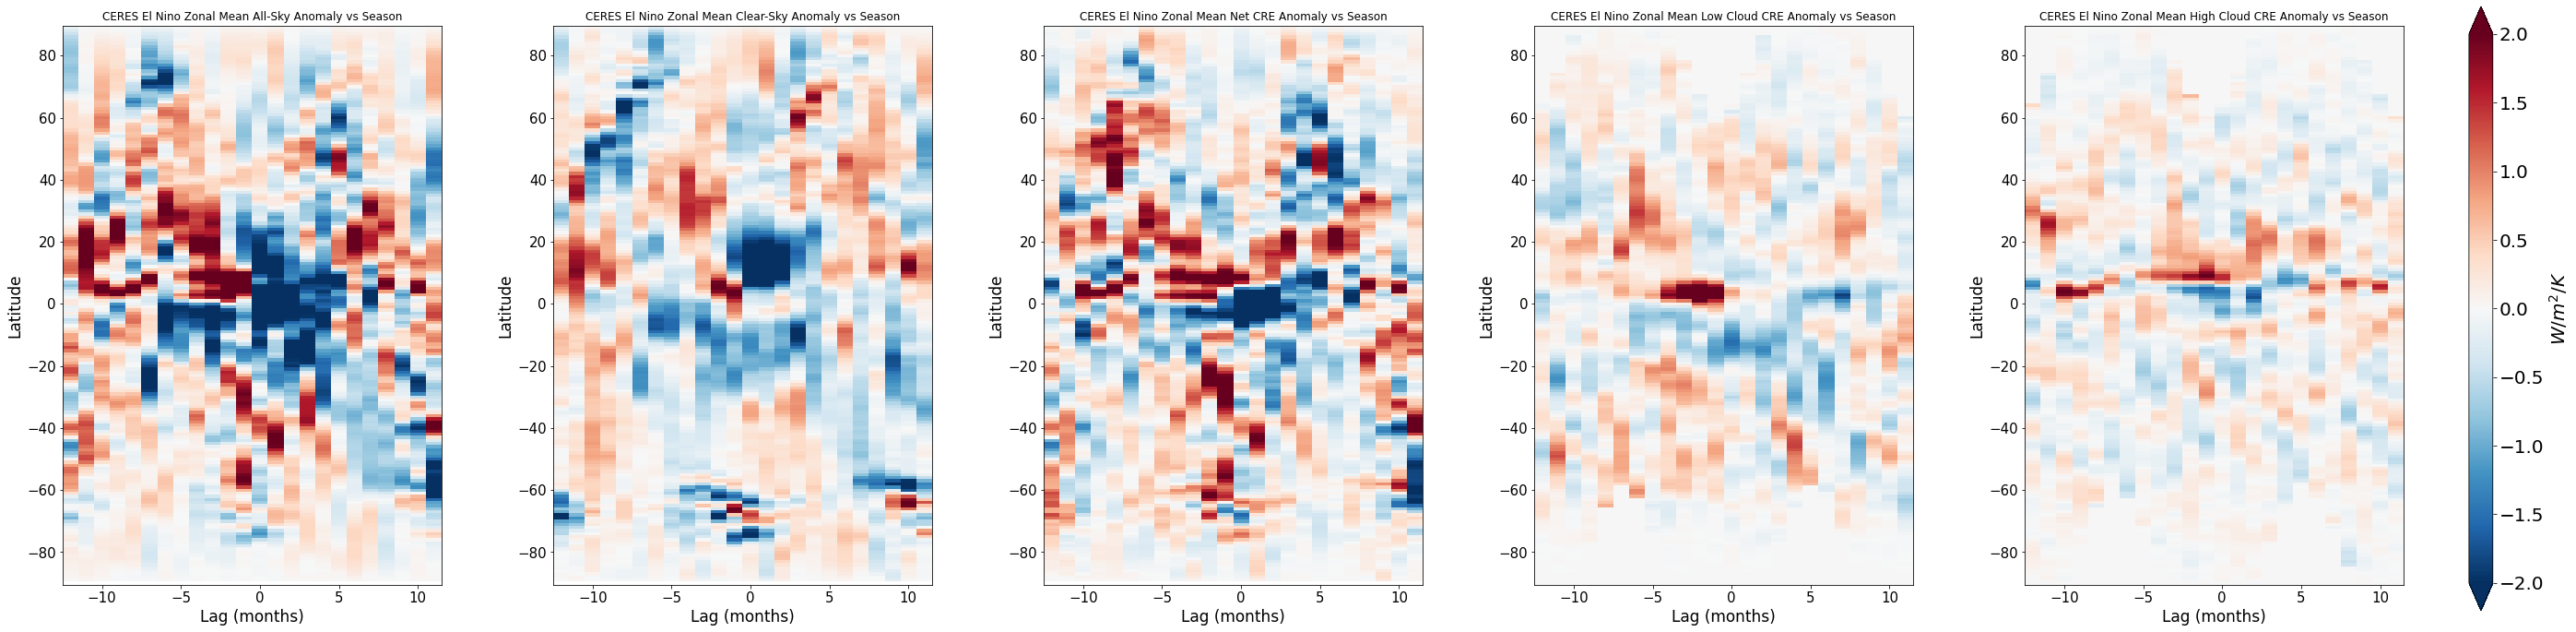

In [6]:
## Get zonal composites for each lag
if get_ceres_cre_mon_zonal == 1:
    
    get_zonal_ceres_cre()

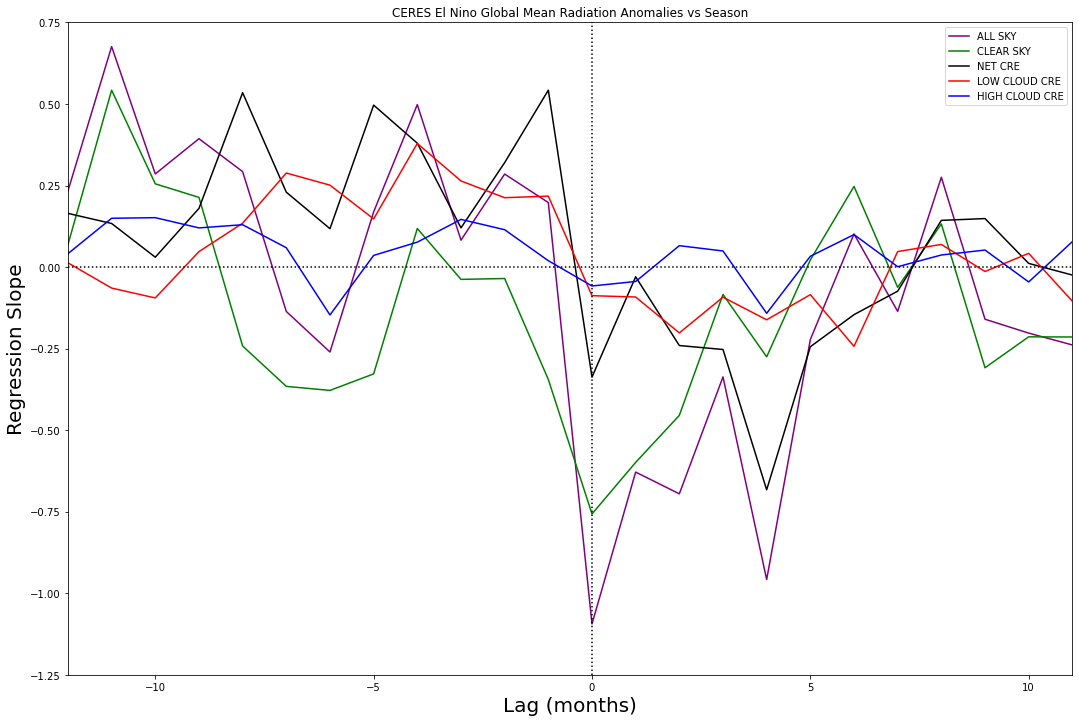

In [7]:
## Get global-mean composites for each lag
if get_ceres_cre_mon_gm == 1:
    lag = range(-12,12)
    
    get_gm_ceres_cre()